<a href="https://colab.research.google.com/github/Jeetesh1512/learnML/blob/main/ML_Jovian_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estimate rain on next day using the dataset containing weather for 10 years

In [6]:
!pip install opendatasets --upgrade --quiet

In [7]:
import opendatasets as od

In [8]:
od.version()

'0.1.22'

In [9]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'


In [10]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jeeteshabrol
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 884MB/s]

In [11]:
import os

In [12]:
data_dir = './weather-dataset-rattle-package/'

In [13]:
os.listdir(data_dir)

['weatherAUS.csv']

In [14]:
train_csv = data_dir + '/weatherAUS.csv'

In [15]:
!pip install pandas --quiet

In [16]:
import pandas as pd

In [17]:
raw_df = pd.read_csv(train_csv)

In [18]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [19]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

We should discard the rows where either RainToday or RainTomorrow is null

In [20]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [21]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [22]:
!pip install plotly matplotlib seaborn --quiet

In [23]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize'] =(10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [24]:
px.histogram(raw_df,x='Location', title='Location vs. Rainy Days', color='RainToday')

In [25]:
px.histogram(raw_df,
             x='Temp3pm',
             title='Temperature at 3 pm vs. Rain Tomorrow',
             color='RainTomorrow')

In [26]:
px.histogram(raw_df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [27]:
px.scatter(raw_df.sample(2000),
           title='Min Temp. vs. Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

When it rains on a particular day, then the variation in temperature is pretty low

In [28]:
px.strip(raw_df.sample(2000),
         title='Temp (3pm) vs. Humidity(3pm)',
         x='Temp3pm',
         y='Humidity3pm',
         color='RainTomorrow')

#Temp low and Humidity high leads to rain mostly

# If dataset is large, use sample

In [29]:
use_sample = False

In [30]:
sample_fraction=0.1

In [31]:
if use_sample:
  raw_df = raw_df.sample(frac=sample_fraction).copy()

#Training, Validation and Test Sets

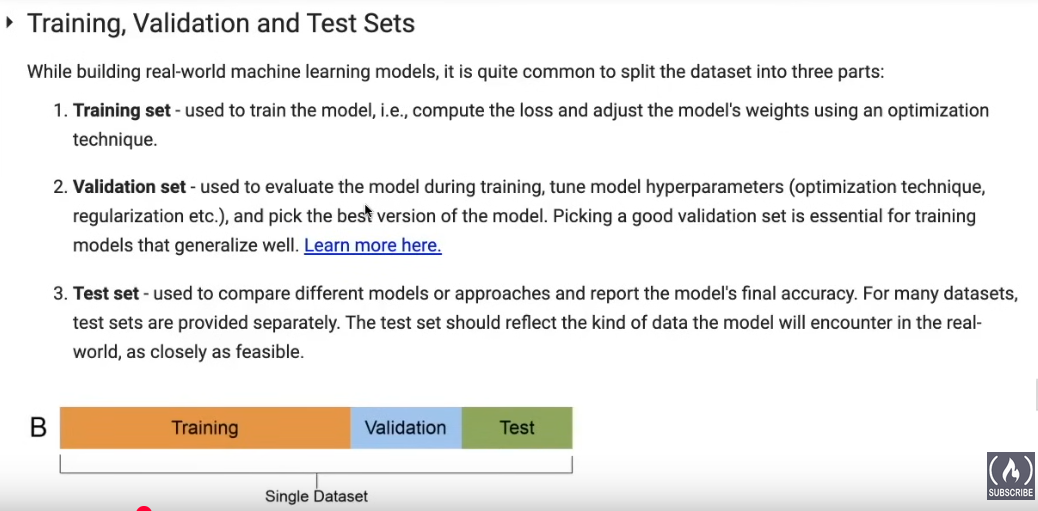

As a general thumb rule, we can use around 60% of the data for the training set, 20% for validation and 20% for evaluation

train_test_split is used

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_val_df , test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [34]:
print('train_df.shape: ',train_df.shape)
print('val_df.shape',val_df.shape)
print('test_df.shape',test_df.shape)

train_df.shape:  (84471, 23)
val_df.shape (28158, 23)
test_df.shape (28158, 23)


When working with dates, it's better to separate the training, validation and test sets with time so that the model is trained on data from the past and evaluated on the date from the future

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set and the one year before it for the validation set

<Axes: title={'center': 'No of rows per year'}, xlabel='Date', ylabel='count'>

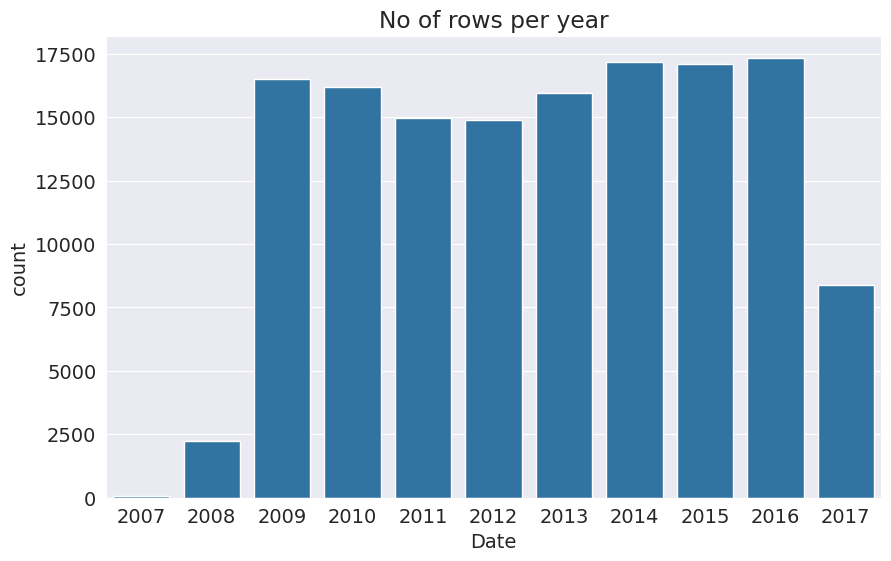

In [35]:
plt.title('No of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [36]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year>2015]

#Identifying Input and Target Columns

not all columns are useful. e.g. Here we can ignore the data column


In [37]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [38]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
